In [ ]:
#MSDA7001 CODING

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

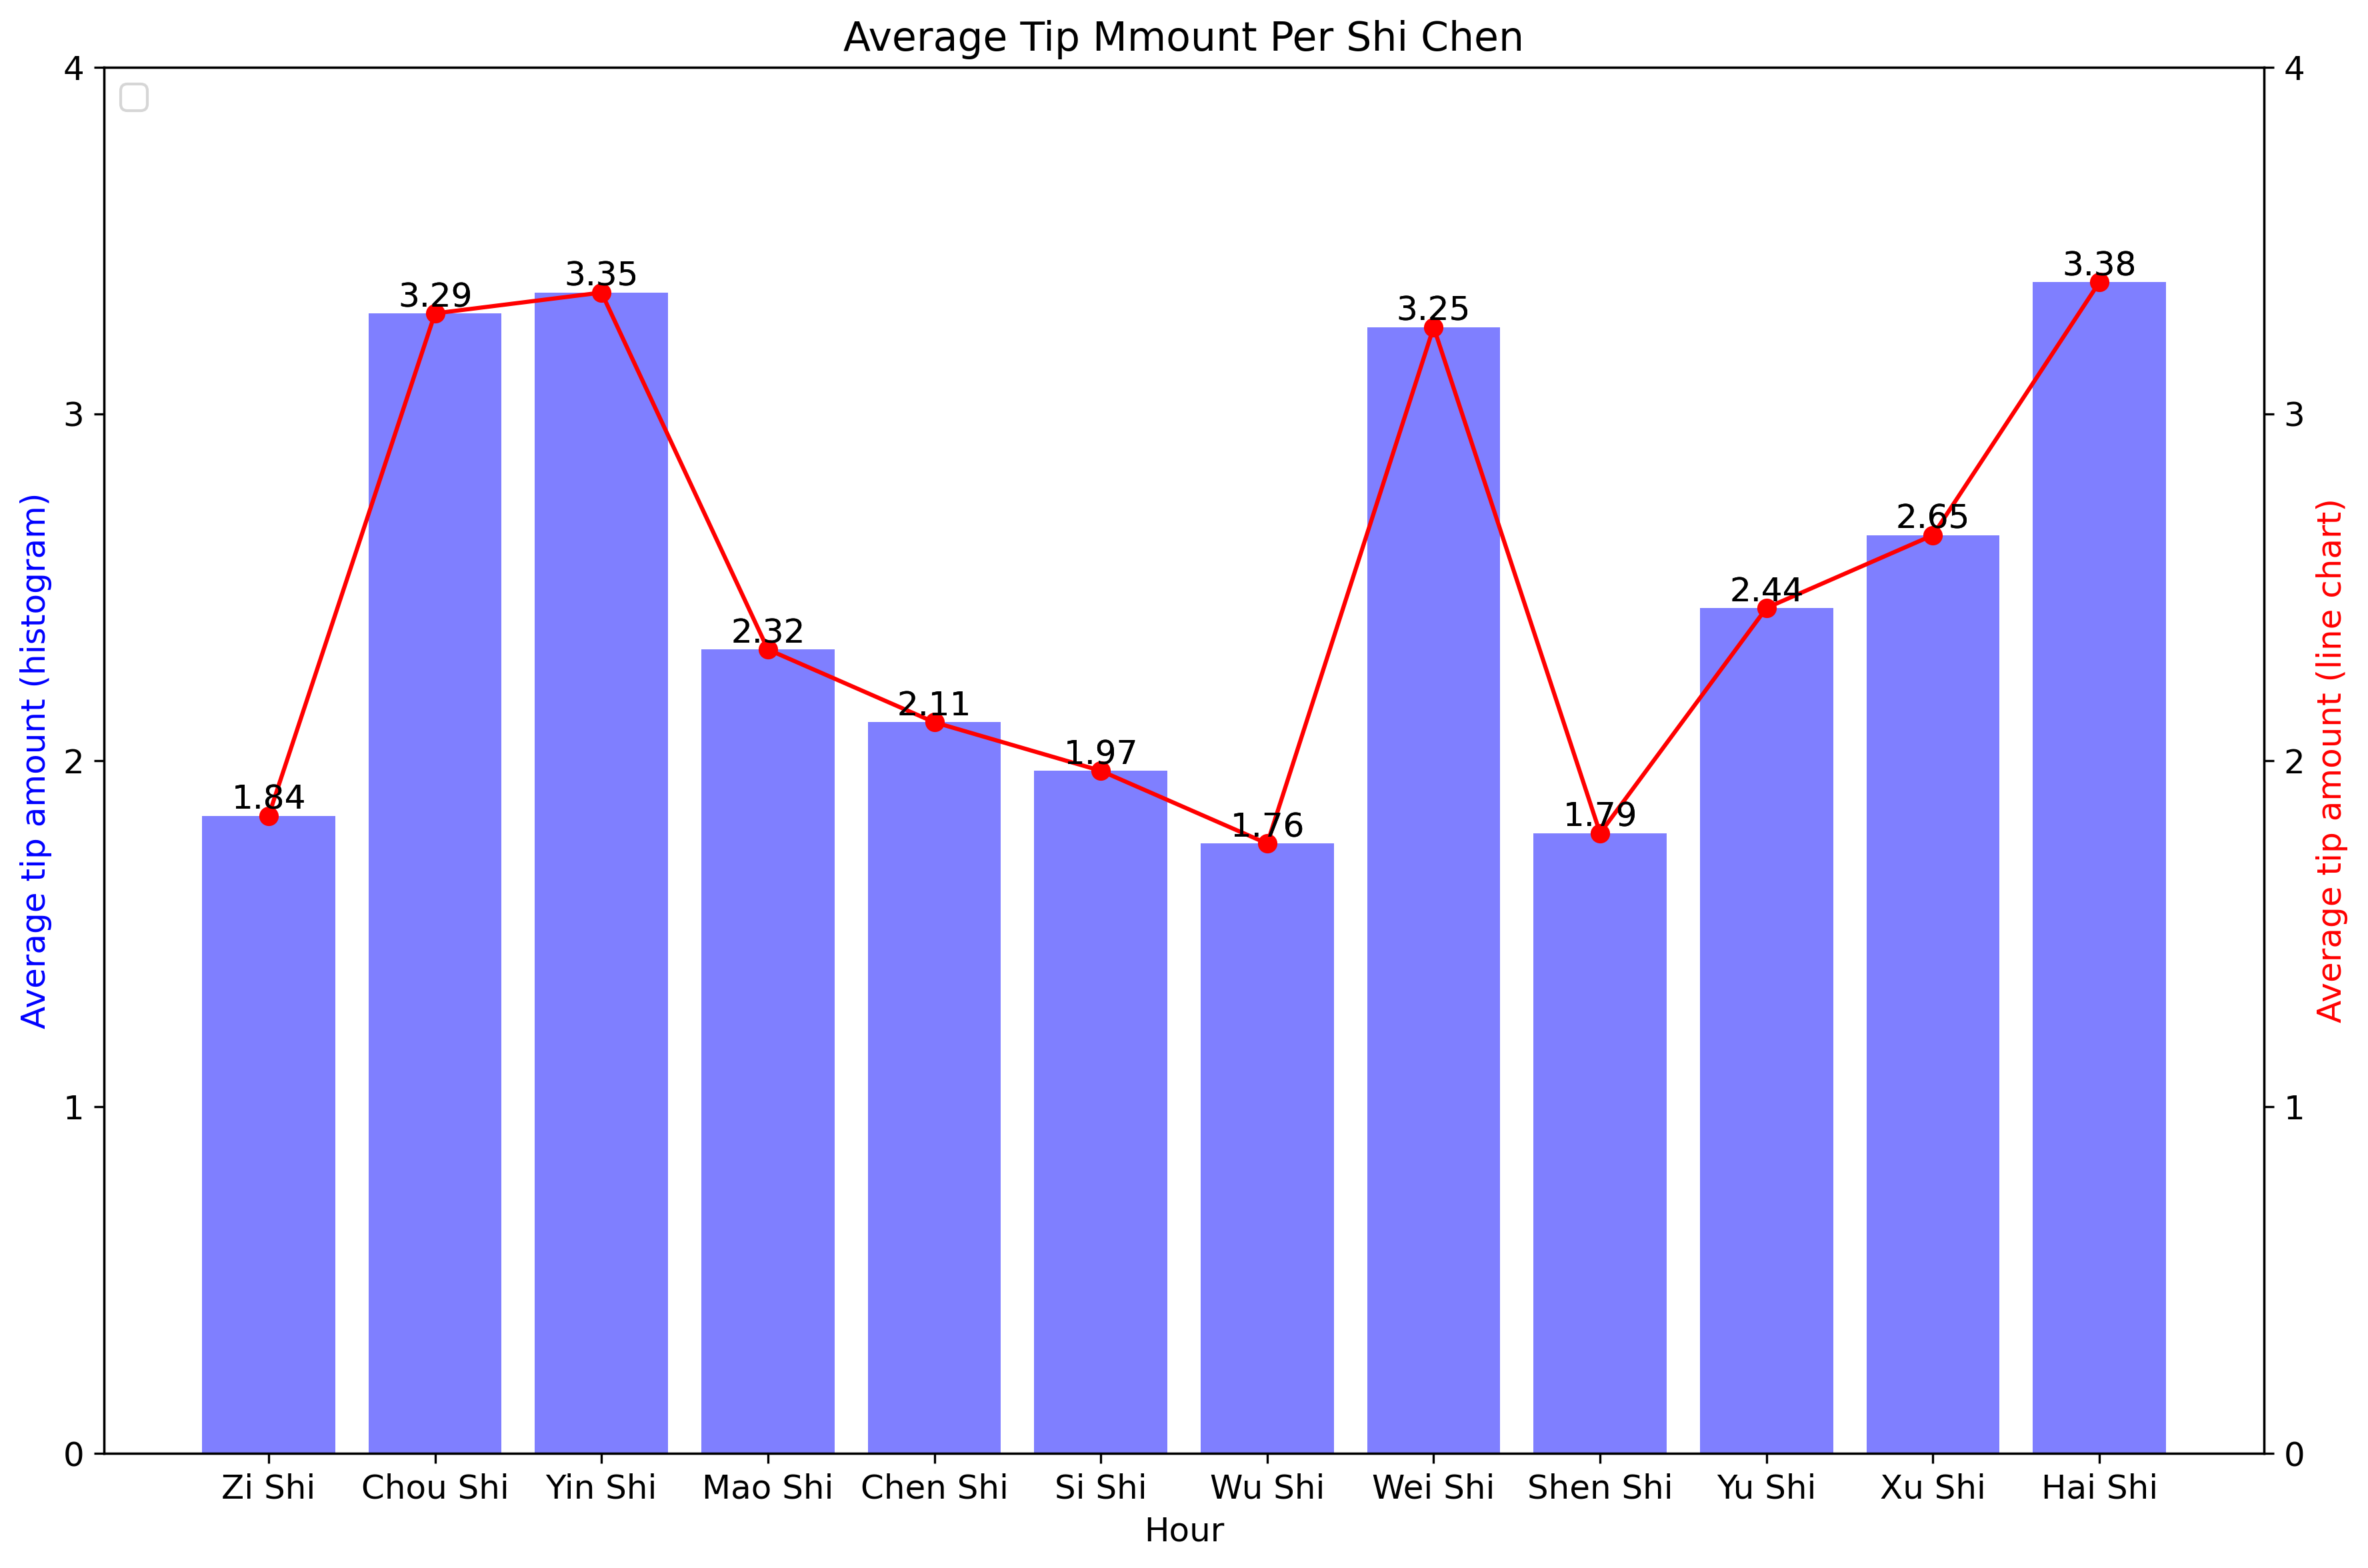

<Figure size 1920x1440 with 0 Axes>

In [30]:
# Average tip amount per Shi Chen


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the clarity of figure and the size of font
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

font_files = font_manager.findSystemFonts(fontpaths = font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Define a function that maps hours to the corresponding hours
def hour_to_shichen(hour):
    if 23 <= hour or hour < 1:
        return 'Zi Shi'
    elif 1 <= hour < 3:
        return 'Chou Shi'
    elif 3 <= hour < 5:
        return 'Yin Shi'
    elif 5 <= hour < 7:
        return 'Mao Shi'
    elif 7 <= hour < 9:
        return 'Chen Shi'
    elif 9 <= hour < 11:
        return 'Yi Shi'
    elif 11 <= hour < 13:
        return 'Wu Shi'
    elif 13 <= hour < 15:
        return 'Wei Shi'
    elif 15 <= hour < 17:
        return 'Shen Shi'
    elif 17 <= hour < 19:
        return 'You Shi'
    elif 19 <= hour < 21:
        return 'Xu Shi'
    elif 21 <= hour < 23:
        return 'Hai Shi'


# Create a new column to represent the hour
def by_time(data_2023):
    # Convert the trip_start_timestamp column to datetime format
    data_2023['trip_start_timestamp'] = pd.to_datetime(data_2023['trip_start_timestamp'])
    # Extraction "hour"
    data_2023['hour'] = data_2023['trip_start_timestamp'].dt.hour
    # Create a new column to represent "Shi Chen"
    data_2023['shichen'] = data_2023['hour'].apply(hour_to_shichen)
    # Delete columns with the same values in the columns
    data_2023 = data_2023.drop(columns=[col for col in data_2023.columns if data_2023[col].nunique() == 1])
    # Convert the missing values to NaN
    data_2023 = data_2023.replace('?', np.nan)
    # Calculate the average tip amount for each hour, keeping two decimal places
    shichen_avg_tips = data_2023.groupby('shichen')['tips'].mean().reset_index(name='The average amount of tip').round(2)
    return shichen_avg_tips


# Set the double Y axes
def plt_chart(data):
    # Set the size of canvas
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()
    # Determine the plot spacing for the Y axis
    max_value = np.ceil(data['The average amount of tip'].max())
    y_ticks = range(0, int(max_value) + 1)

    # Draw a histogram
    bars = ax1.bar(data['shichen'], data['The average amount of tip'], color='blue', alpha=0.5)
    # Add histogram data labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

    # Draw a line chart
    ax2.plot(data['shichen'], data['The average amount of tip'], color='red', marker='o')
    # Add a line chart data label
    for i, j in enumerate(data['The average amount of tip']):
        ax2.text(i, j, f'{j:.2f}', ha='center', va='bottom')

    # Set axis labels and titles
    ax1.set_xlabel('Hour')
    ax1.set_ylabel('Average tip amount (histogram)', color='blue')
    ax2.set_ylabel('Average tip amount (line chart)', color='red')
    ax1.set_yticks(y_ticks)
    ax2.set_yticks(y_ticks)
    ax1.set_title('Average Tip Mmount Per Shi Chen')

    # Set axis labels and titles
    plt.xticks(rotation=45)

    # Reset the x-axis scale order
    shichen_order = ['Zi Shi', 'Chou Shi', 'Yin Shi', 'Mao Shi', 'Chen Shi', 'Si Shi', 'Wu Shi', 'Wei Shi', 'Shen Shi', 'Yu Shi', 'Xu Shi', 'Hai Shi']
    plt.xticks(range(len(shichen_order)), shichen_order)

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # Adjust the layout and display graphics
    plt.tight_layout()
    plt.show()


# Read the dataset
data_2023 = pd.read_csv('/Users/harrietlyu/Desktop/merged_file.csv')

# Call functions to process data and draw graphs
plt_chart(by_time(data_2023))
plt.savefig('Average Tip amount in Per Shi Chen.png')

In [ ]:
#Q2 routes and locations

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from collections import Counter

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
df=pd.read_csv('merged_file.csv')

In [ ]:
# Create "pickup_location" and "dropoff_location" columns by combining latitude and longitude
df["pickup_location"] = list(zip(df["pickup_centroid_latitude"], df["pickup_centroid_longitude"]))
df["dropoff_location"] = list(zip(df["dropoff_centroid_latitude"], df["dropoff_centroid_longitude"]))

In [ ]:
# Count the most popular pickup and dropoff locations
pickup_counter = Counter(df["pickup_location"])
dropoff_counter = Counter(df["dropoff_location"])

In [ ]:
# Get the top 10 pickup and dropoff locations
top_pickups = pickup_counter.most_common(10)
top_dropoffs = dropoff_counter.most_common(10)

In [ ]:
print("Top 10 Pickup Locations:", top_pickups)
print("Top 10 Dropoff Locations:", top_dropoffs)

In [ ]:

# Create a map object
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)


# Add top pickup locations to the map
for location, count in top_pickups:
    folium.Marker(
        location=location,
        popup=f"Pickup - Count: {count}",
        icon=folium.Icon(color="blue", icon="cloud")
    ).add_to(m)


# Add top dropoff locations to the map
for location, count in top_dropoffs:
    folium.Marker(
        location=location,
        popup=f"Dropoff - Count: {count}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)


# Save and display the map
m.save("hotspots_map.html")
m

In [ ]:
print(df.isnull().sum())

In [ ]:
# clean data
columns_to_check = ["pickup_centroid_latitude", "pickup_centroid_longitude", "dropoff_centroid_latitude", "dropoff_centroid_longitude"]
df_cleaned = df.dropna(subset=columns_to_check).reset_index(drop=True)

In [ ]:
print(df_cleaned.isnull().sum())

In [ ]:
from folium.plugins import HeatMap
import folium
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)
pickup_heat_data = df_cleaned[["pickup_centroid_latitude", "pickup_centroid_longitude"]].values.tolist()
dropoff_heat_data = df_cleaned[["dropoff_centroid_latitude", "dropoff_centroid_longitude"]].values.tolist()
# heatmap
HeatMap(pickup_heat_data, radius=10, name="Pickup Heatmap").add_to(m)
HeatMap(dropoff_heat_data, radius=10, name="Dropoff Heatmap", gradient={0.2: 'blue', 0.5: 'lime', 1: 'red'}).add_to(m)
m.save("pickup_dropoff_heatmap.html")
m

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# pick location
pickup_coords = df_cleaned[["pickup_centroid_latitude", "pickup_centroid_longitude"]].values
dropoff_coords = df_cleaned[["dropoff_centroid_latitude", "dropoff_centroid_longitude"]].values

In [ ]:
#cluster
kmeans_pickup = KMeans(n_clusters=5, random_state=42)
pickup_clusters = kmeans_pickup.fit_predict(pickup_coords)
kmeans_dropoff = KMeans(n_clusters=5, random_state=42)
dropoff_clusters = kmeans_dropoff.fit_predict(dropoff_coords)
df_cleaned["pickup_cluster"] = pickup_clusters
df_cleaned["dropoff_cluster"] = dropoff_clusters

In [ ]:
# visualize
plt.figure(figsize=(10, 5))

# cluster for departure
plt.subplot(1, 2, 1)
plt.scatter(pickup_coords[:, 1], pickup_coords[:, 0], c=pickup_clusters, cmap="viridis", s=5)
plt.colorbar(label="Pickup Cluster")
plt.title("Pickup Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# cluster for destination
plt.subplot(1, 2, 2)
plt.scatter(dropoff_coords[:, 1], dropoff_coords[:, 0], c=dropoff_clusters, cmap="viridis", s=5)
plt.colorbar(label="Dropoff Cluster")
plt.title("Dropoff Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.savefig('clusters.png', dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.figure(figsize=(10, 8))
precise_regions = {
    "The Loop": {
        "lat_range": [41.88, 41.90],
        "lon_range": [-87.65, -87.63],
        "color": "skyblue"
    },
    "Near West Side": {
        "lat_range": [41.85, 41.88],
        "lon_range": [-87.66, -87.64],
        "color": "lightcoral"
    },
    "Near South Side": {
        "lat_range": [41.85, 41.88],
        "lon_range": [-87.63, -87.60],
        "color": "lightgreen"
    },
    "Lakeview": {
        "lat_range": [41.95, 41.97],
        "lon_range": [-87.66, -87.63],
        "color": "gold"
    },
    "Uptown": {
        "lat_range": [41.97, 42.00],
        "lon_range": [-87.67, -87.64],
        "color": "orange"
    },
    "Edgewater": {
        "lat_range": [41.98, 42.00],
        "lon_range": [-87.67, -87.65],
        "color": "purple"
    }
}

# plot
for region, info in precise_regions.items():
    lat_min, lat_max = info["lat_range"]
    lon_min, lon_max = info["lon_range"]
    plt.gca().add_patch(Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                                   color=info["color"], alpha=0.6, label=region))

# define lable
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Chicago Detailed Area Clusters by Latitude and Longitude")
plt.xlim(-87.70, -87.60)
plt.ylim(41.85, 42.05)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) 
plt.tight_layout()

# save
plt.savefig("Chicago_Detailed_Clusters.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#Q3 time 

In [ ]:
!pip install folium
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from collections import Counter
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

plt.rcParams['font.family'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

df = pd.read_csv('merged_file.csv')

In [ ]:
df['times'] = pd.to_datetime(df['trip_end_timestamp'])

# define function for transfer time
def get_shichen(time):
    hour = time.hour
    if hour == 23 or hour < 1:
        return 'ZiShi 子时'  
    elif hour < 3:
        return 'ChouShi 丑时' 
    elif hour < 5:
        return 'YinShi 寅时' 
    elif hour < 7:
        return 'MaoShi 卯时'  
    elif hour < 9:
        return 'ChenShi 辰时'  
    elif hour < 11:
        return 'SiShi 巳时'  
    elif hour < 13:
        return 'WuShi 午时'  
    elif hour < 15:
        return 'WeiShi 未时'  
    elif hour < 17:
        return 'ShenShi 申时'  
    elif hour < 19:
        return 'YouShi 酉时'  
    elif hour < 21:
        return 'XuShi 戌时'  
    else:
        return 'HaiShi 亥时'  

# create shichen
df['shichen'] = df['times'].apply(get_shichen)
df[['shichen']]

In [ ]:
# set order
shichen_order = [
    'ZiShi 子时', 'ChouShi 丑时', 'YinShi 寅时', 'MaoShi 卯时', 
    'ChenShi 辰时', 'SiShi 巳时', 'WuShi 午时', 'WeiShi 未时', 
    'ShenShi 申时', 'YouShi 酉时', 'XuShi 戌时', 'HaiShi 亥时'
]

# groupby shichen
shichen_counts = df.groupby('shichen').size().reset_index(name='trip_count')

# visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='shichen', y='trip_count', data=shichen_counts, palette='viridis', order=shichen_order)
plt.title('Distribution of trips by ShiChen')
plt.xlabel('Shi Chen')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.savefig('Distribution of trips by Shichen.png')
plt.show()



In [ ]:
# Create "dropoff_location" columns by combining latitude and longitude
df["dropoff_location"] = list(zip(df["dropoff_centroid_latitude"], df["dropoff_centroid_longitude"]))

In [ ]:
import folium
from collections import Counter

# set color
colors = {
    'ZiShi 子时': 'blue',
    'ChouShi 丑时': 'green',
    'YinShi 寅时': 'purple',
    'MaoShi 卯时': 'orange',
    'ChenShi 辰时': 'red',
    'SiShi 巳时': 'pink',
    'WuShi 午时': 'darkblue',
    'WeiShi 未时': 'lightgreen',
    'ShenShi 申时': 'darkred',
    'YouShi 酉时': 'yellow',
    'XuShi 戌时': 'brown',
    'HaiShi 亥时': 'gray'
}

# define locations
chicago_location = [41.8781, -87.6298]
chicago_bounds = [[41.6, -88], [42.1, -87]]

for shichen in df['shichen'].unique():
    df_shichen = df[df['shichen'] == shichen]
    dropoff_counts = Counter(tuple(loc) for loc in df_shichen['dropoff_location'])
    top_dropoffs = dropoff_counts.most_common(10)

    m = folium.Map(location=chicago_location, zoom_start=12, max_bounds=True, 
                   min_zoom=10, max_zoom=16)
    m.fit_bounds(chicago_bounds)
    color = colors.get(shichen, 'blue')  

    for location, count in top_dropoffs:
        popup_content = f"Time: {shichen}<br>Count: {count}"
        
        folium.Marker(
            location=location,
            popup=popup_content,
            icon=folium.Icon(color=color, icon="info-sign")
        ).add_to(m)
    m.save(f"hotspots_map_{shichen}.html")



In [ ]:
import folium
from collections import Counter

# allot color and lable
shichen_translation = {
    'ZiShi 子时': 'ZiShi 子时 (11:00 PM - 1:00 AM)',
    'ChouShi 丑时': 'ChouShi 丑时 (1:00 AM - 3:00 AM)',
    'YinShi 寅时': 'YinShi 寅时 (3:00 AM - 5:00 AM)',
    'MaoShi 卯时': 'MaoShi 卯时 (5:00 AM - 7:00 AM)',
    'ChenShi 辰时': 'ChenShi 辰时 (7:00 AM - 9:00 AM)',
    'SiShi 巳时': 'SiShi 巳时 (9:00 AM - 11:00 AM)',
    'WuShi 午时': 'WuShi 午时 (11:00 AM - 1:00 PM)',
    'WeiShi 未时': 'WeiShi 未时 (1:00 PM - 3:00 PM)',
    'ShenShi 申时': 'ShenShi 申时 (3:00 PM - 5:00 PM)',
    'YouShi 酉时': 'YouShi 酉时 (5:00 PM - 7:00 PM)',
    'XuShi 戌时': 'XuShi 戌时 (7:00 PM - 9:00 PM)',
    'HaiShi 亥时': 'HaiShi 亥时 (9:00 PM - 11:00 PM)'
}

colors = {
    'ZiShi 子时 (11:00 PM - 1:00 AM)': 'blue',
    'ChouShi 丑时 (1:00 AM - 3:00 AM)': 'green',
    'YinShi 寅时 (3:00 AM - 5:00 AM)': 'purple',
    'MaoShi 卯时 (5:00 AM - 7:00 AM)': 'orange',
    'ChenShi 辰时 (7:00 AM - 9:00 AM)': 'red',
    'SiShi 巳时 (9:00 AM - 11:00 AM)': 'pink',
    'WuShi 午时 (11:00 AM - 1:00 PM)': 'darkblue',
    'WeiShi 未时 (1:00 PM - 3:00 PM)': 'lightgreen',
    'ShenShi 申时 (3:00 PM - 5:00 PM)': 'darkred',
    'YouShi 酉时 (5:00 PM - 7:00 PM)': 'yellow',
    'XuShi 戌时 (7:00 PM - 9:00 PM)': 'brown',
    'HaiShi 亥时 (9:00 PM - 11:00 PM)': 'gray'
}

# set objects
chicago_location = [41.8781, -87.6298]
m = folium.Map(location=chicago_location, zoom_start=12)
for shichen, shichen_en in shichen_translation.items():
    df_shichen = df[df['shichen'] == shichen]
    dropoff_counts = Counter(tuple(loc) for loc in df_shichen['dropoff_location'])
    
    # select top10 destination
    top_dropoffs = dropoff_counts.most_common(10)
    color = colors.get(shichen_en, 'blue') 
    layer = folium.FeatureGroup(name=shichen_en)

    for location, count in top_dropoffs:
        popup_content = f"Shichen: {shichen_en}<br>Dropoff count: {count}"
        folium.Marker(
            location=location,
            popup=popup_content,
            icon=folium.Icon(color=color, icon="info-sign")
        ).add_to(layer)
    layer.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

# save
m.save("all_shichen_hotspots_map_ordered.html")
m
